In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def plot_performance_drop(performances_wacky, performances_random, title=""):
    thresholds = performances_wacky.keys()
    threshold_ints = [int(t) if t != 'all' else 30000 for t in thresholds]

    def aggregate(data, metric):
        means = []
        stds = []
        thresholds_list = [threshold for threshold in data['0'].keys()]
        runs = [run for run in data]
        for threshold in thresholds_list:
            vals = [data[run][threshold][metric] for run in runs if threshold in data[run] and metric in data[run][threshold]]
            if len(vals) == 0:
                means.append(np.nan)
                stds.append(np.nan)
            else:
                means.append(np.mean(vals))
                stds.append(np.std(vals))
        return np.array(means), np.array(stds)

    mrr_mean, mrr_std = aggregate(performances_random, 'mrr_10')
    recall10_mean, recall10_std = aggregate(performances_random, 'recall_10')
    recall100_mean, recall100_std = aggregate(performances_random, 'recall_100')
    recall1000_mean, recall1000_std = aggregate(performances_random, 'recall_1000')

    fig = plt.figure(figsize=(17, 4))

    plt.subplot(1, 4, 1)
    plt.plot(threshold_ints, [performances_wacky[t]['mrr_10'] for t in thresholds], label='wacky tokens', color='tab:blue')
    plt.plot(threshold_ints, mrr_mean, label='random mean', color='tab:orange')
    plt.fill_between(threshold_ints, mrr_mean - 2 * mrr_std, mrr_mean + 2 * mrr_std, color='tab:orange', alpha=0.2, label='random ±2σ')
    plt.grid()
    plt.ylabel('MRR@10', fontsize=14)
    plt.legend()

    plt.subplot(1, 4, 2)
    plt.plot(threshold_ints, [performances_wacky[t]['recall_10'] for t in thresholds], label='wacky tokens', color='tab:blue')
    plt.plot(threshold_ints, recall10_mean, label='random mean', color='tab:orange')
    plt.fill_between(threshold_ints, recall10_mean - 2 * recall10_std, recall10_mean + 2 * recall10_std, color='tab:orange', alpha=0.2, label='random ±2σ')
    plt.grid()
    plt.ylabel('Recall@10', fontsize=14)
    plt.legend()

    plt.subplot(1, 4, 3)
    plt.plot(threshold_ints, [performances_wacky[t]['recall_100'] for t in thresholds], label='wacky tokens', color='tab:blue')
    plt.plot(threshold_ints, recall100_mean, label='random mean', color='tab:orange')
    plt.fill_between(threshold_ints, recall100_mean - 2 * recall100_std, recall100_mean + 2 * recall100_std, color='tab:orange', alpha=0.2, label='random ±2σ')
    plt.grid()
    plt.ylabel('Recall@100', fontsize=14)
    plt.legend()

    plt.subplot(1, 4, 4)
    plt.plot(threshold_ints, [performances_wacky[t]['recall_1000'] for t in thresholds], label='wacky tokens', color='tab:blue')
    plt.plot(threshold_ints, recall1000_mean, label='random mean', color='tab:orange')
    plt.fill_between(threshold_ints, recall1000_mean - 2 * recall1000_std, recall1000_mean + 2 * recall1000_std, color='tab:orange', alpha=0.2, label='random ±2σ')
    plt.grid()
    plt.ylabel('Recall@1000', fontsize=14)
    plt.legend()

    plt.suptitle(title, fontsize=16)
    fig.text(0.5, 0.04, 'Number of Removed Tokens', ha='center', va='center', fontsize=14)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

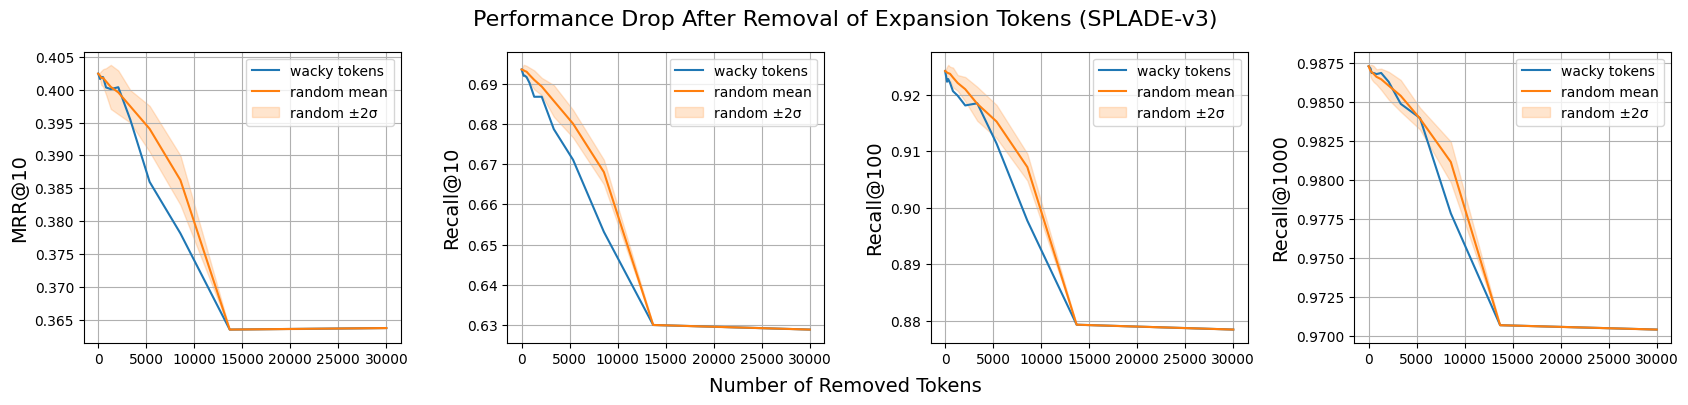

In [7]:
performances_wacky_v3 = json.load(open('experiments/impact_on_retrieval_performance/splade_v3_performance_drop_wacky_tokens.json', 'r'))
performances_random_v3 = json.load(open('experiments/impact_on_retrieval_performance/splade_v3_performance_drop_random_tokens.json', 'r'))

plot_performance_drop(performances_wacky_v3, performances_random_v3, title='Performance Drop After Removal of Expansion Tokens (SPLADE-v3)')

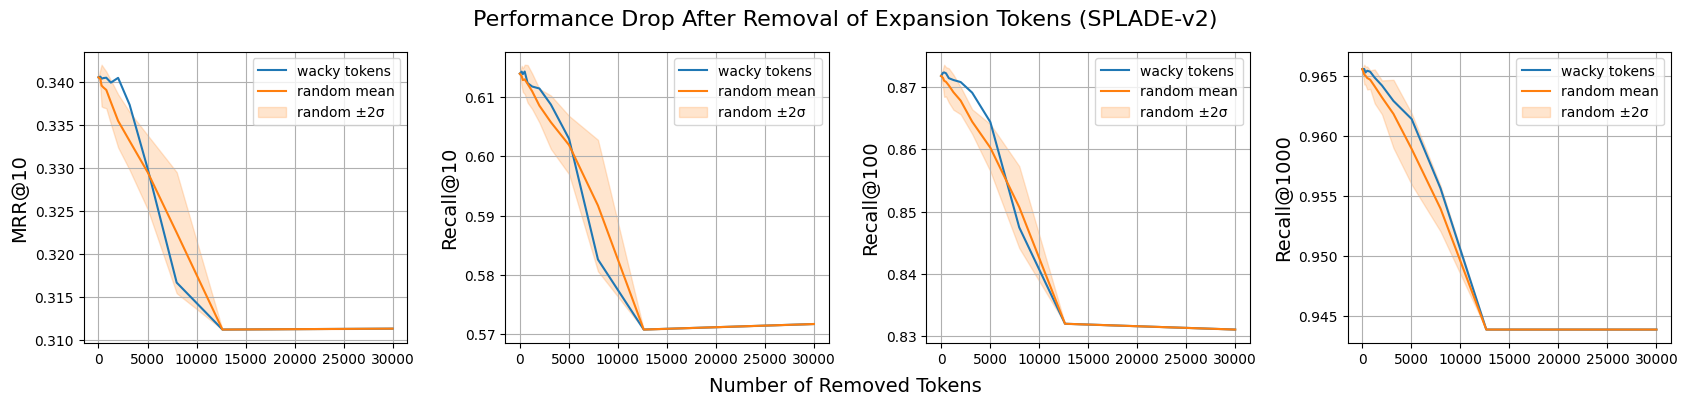

In [10]:
performances_wacky_v2 = json.load(open('experiments/impact_on_retrieval_performance/splade_v2_performance_drop_wacky_tokens.json', 'r'))
performances_random_v2 = json.load(open('experiments/impact_on_retrieval_performance/splade_v2_performance_drop_random_tokens.json', 'r'))

plot_performance_drop(performances_wacky_v2, performances_random_v2, title='Performance Drop After Removal of Expansion Tokens (SPLADE-v2)')